# Higra: Hierarchical Graph Analysis

### Benjamin Perret - LIGM, ESIEE Paris, Université Gustave Eiffel


<div style="margin-top:75px">
    <img src="https://upload.wikimedia.org/wikipedia/fr/3/30/Logo_Universit%C3%A9_Gustave_Eiffel_2020.svg" width="200px" style="margin-left:auto;margin-right:auto;"/>
</div>




## Outline

1. Gentle introduction to hierarchical segmentation
2. General presentation of Higra
3. Hands on Higra on a toy case
4. Demonstration in image processing

# 1. Hierarchy of segmentations

    
<div style="margin-top:75px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/intro_hierarchy.png" width="800px"  style="margin-left:auto;margin-right:auto;"/>
</div>



# Hierarchy of segmentations reality

- Imperfect representation
- Interesting elements are somewhere there and easier to find than in raw pixel 

<div style="margin-top:75px;"><table><tr style="background-color:#fff;">
    <td> <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/intro_hierarchy2.png" width="400px"  style="margin-right:10px;"/></td>
    <td><img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/cob_246009.gif" width="200px"/> </td>
</tr></table></div>

# Hierarchy  - Processing scheme

1. Represent hierarchy as a tree
2. Compute relevant node features in tree space
3. Process this new structured space

<div style="margin-top:25px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/general-proc.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

# Example: interactive segmentation



<div style="margin-top:75px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/demo2.gif" width="700px"  style="margin-left:auto;margin-right:auto;"/>
    <p  style="text-align: center;"><a href= "https://perso.esiee.fr/~perretb/ISeg/" style="margin-left:auto;margin-right:auto;">https://perso.esiee.fr/~perretb/ISeg/</a></p>
</div>

# Example: interactive segmentation

- $B$: background marker
- $F$: foreground marker

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/interactive_seg_algo.png" width="1000px"  style="margin-left:auto;margin-right:auto;"/>
</div>



# 2. General presentation of Higra

**Higra: Hierarchical Graph Analysis**

- **Hierarchical clustering methods**: quasi-flat zone hierarchy, hierarchical watersheds, energy hierarchy, agglomerative clustering...
- **Component trees**: min-tree, max-tree, tree-of-shapes;
- **Algorithms to manipulate and explore hierarchies**:  simplification, accumulators, cluster extraction, various attributes, cuts...
- **Hierarchical clustering assessment**: supervised and non-supervised assessment
- **Image toolbox**: tools to work with images

## Some technical facts:

- Header only C++ core 
- Unit test coverage: 99%
- Python bindings thanks to *Pybind11*
- Seamless conversion between *numpy* arrays and c++ arrays with *xtensor*
- Seamless integration in the Python ecosystem: *Scikit-learn*, *Scipy*, *PyTorch*...

## Some works done with Higra

###  Continuous optimization of hierarchical clustering

[Ultrametric fitting by gradient descent, G. Chierchia et B. Perret, Neurips 2019](https://arxiv.org/pdf/1905.10566.pdf)

<div style="margin-top:20px;"><table><tr style="background-color:#fff;">
    <td> <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/dasgupta_varied_clustering.png" width="300px" style="margin-right:50px;"/></td>
    <td><img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/dasgupta_varied_dendrogram.gif" width="350px"/> </td>
</tr></table></div>

## Some works done with Higra

### Continuous optimization of hierarchical clustering

[Visualizing hierarchies in scRNA-seq data using a density tree-biased autoencoder, Q Garrido et al. ArXiv, 2021](https://arxiv.org/pdf/2102.05892.pdf)

<div style="margin-top:20px;"><table><tr style="background-color:#fff;">
    <td> <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/umap1.png" width="300px"  style="margin-right:50px;"/></td>
    <td><img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/umap2.png" width="300px"/> </td>
</tr></table></div>

## Some works done with Higra

### Interactive image segmentation with learning

[Rethinking Interactive Image Segmentation: Feature Space Annotation, J. Bragantini et al. ArXiv, 2021](https://arxiv.org/pdf/2101.04378.pdf)

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/interactive_seg_feature_learning.png" width="1000px"  style="margin-left:auto;margin-right:auto;"/>
</div>

## Some works done with Higra

### Topological loss functions

[Component Tree Loss Functions: Definition and Optimization, B. Perret & J Cousty, ArXiv, 2021](https://arxiv.org/pdf/2101.08063.pdf)

<div style="margin-top:20px;"><table><tr style="background-color:#fff;">
    <td> <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/neurite.png" width="300px" style="margin-right:50px;"/></td>
    <td><img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/optim_component_loss.gif" width="300px"  /> </td>
</tr></table></div>

# 3. Hands on Higra on a toy case

**Install** in one line on Linux, Windows, Mac (pre-compiled binaries)



In [1]:
!pip install higra

**Learn** [https://higra.readthedocs.io/](https://higra.readthedocs.io/)



**Contribute** [https://github.com/higra/Higra](https://github.com/higra/Higra)



In [2]:
import imageio
import matplotlib.pyplot as plt

def plot_graph(graph, vertex_labels=None, edge_weights=None, float_size=3):
    import networkx as nx
    A = hg.undirected_graph_2_adjacency_matrix(graph, sparse=False)
    G = nx.from_numpy_matrix(A)
    options = {
        "node_size": 500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 2,
    }
    pos = nx.spring_layout(G, seed=1)
    
    if vertex_labels is not None:
        vertex_labels = {i : v for i,v in enumerate(vertex_labels)}
    
    float_size = max(3, int(float_size))
    half_float = max(1, float_size // 2)
    prec = max(1, float_size - 1)
    float_format = "{0:" + str(float_size) + "." + str(prec) + "g}"
    
    if edge_weights is not None:
        labels = {}
        for i, (x, y) in enumerate(zip(*graph.edge_list())):
            labels[(x,y)] = float_format.format(edge_weights[i])
        
        edge_weights = edge_weights - edge_weights.min()
        edge_weights = edge_weights / edge_weights.max()
        edge_weights = edge_weights * 5 + 1
        nx.draw_networkx_nodes(G, pos, **options)
        nx.draw_networkx_labels(G, pos, labels=vertex_labels, font_size=18)
        
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_edges(G, pos)
    else:
        nx.draw_networkx(G, pos=pos, width=2, font_size=18, labels=vertex_labels, **options,)
        

## First toy case example:

Let's create our first graph with 5 vertices and 6 edges. Note that vertices are numbered from $0$ to $4$ and edges are numbered from $0$ to $5$.

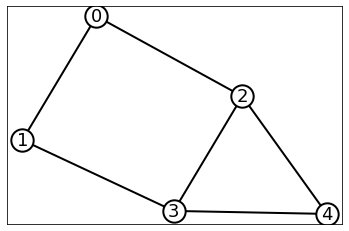

In [3]:
import higra as hg                                      # your favorite import

graph = hg.UndirectedGraph(number_of_vertices=5)        # create a graph with 5 vertices and no edge

sources = (0, 0, 1, 2, 2, 3)                            # source vertices of 6 edges
targets = (1, 2, 3, 3, 4, 4)                            # target vertices of 6 edges
graph.add_edges(sources, targets)                       # add all edges in a batch

plot_graph(graph)

Vertex or edge weights are then simply represented by arrays:    

Graph nodes:	 [0 1 2 3 4]
Node weights:	 [2 1 0 4 9]


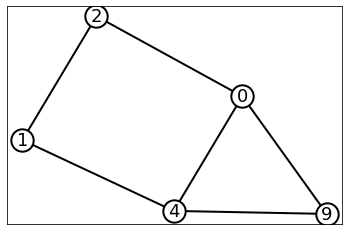

In [4]:
import numpy as np                                       # np.array are used to represent weights

vertex_weights = np.array([2, 1, 0, 4, 9])

# the vertex weights is simply an array associating a weight to each node of the graph
print("Graph nodes:\t", np.arange(graph.num_vertices()))  
print("Node weights:\t", vertex_weights) 

plot_graph(graph, vertex_labels=vertex_weights)

We are going to use these node weights to compute edge weights measuring the dissimilairy between adjacent vertices.

Edge sources:	 [0 0 1 2 2 3]
Edge targets:	 [1 2 3 3 4 4]
Edge weights:	 [1 2 3 4 9 5]


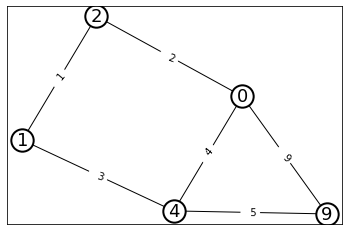

In [5]:
# utility function to weight the edges of a graph based on vertex weights
# here we take the L1 distance between the vertex weights
edge_weights = hg.weight_graph(graph, vertex_weights, hg.WeightFunction.L1)

# the edge weights is simply an array associating a weight to each edge of the graph
sources, targets = graph.edge_list()
print("Edge sources:\t", sources)  
print("Edge targets:\t", targets)  
print("Edge weights:\t", edge_weights.astype(np.int))

plot_graph(graph, edge_weights=edge_weights, vertex_labels=vertex_weights)

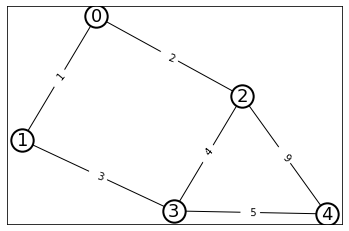

In [6]:
f = plt.figure()
plot_graph(graph, edge_weights=edge_weights)
f.savefig("foo.pdf", bbox_inches='tight')

The simplest hierarchy we can compute on this graph is its *canonical binary partition* tree which is obtained as follows:

1. The finest level of the hierarchy is composed of the indivual vertices of the graph
2. At each step, we take the edge with the smallest weight and we merge the two clusters linked by this edge

1. We start from all vertices

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt1.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

2. The smallest edge is $(0,1)$ with weight $1$ $\Rightarrow$ new cluster 5

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt2.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

3. The smallest edge is then $(0,2)$ with weight $2$ $\Rightarrow$ new cluster 6

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt3.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

4. The smallest edge is then $(1,3)$ with weight $3$ $\Rightarrow$ new cluster 7

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt4.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

5. The smallest edge is then $(2,3)$ with weight $4$  $\Rightarrow$ no new cluster 

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt5.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

6. The smallest edge is then $(3,4)$ with weight $5$  $\Rightarrow$ new cluster 8

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt6.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

7. The smallest edge is then $(2,4)$ with weight $9$  $\Rightarrow$ no new cluster

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt7.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

Note that: 1) each internal cluster is associated to an edge, 2) those edges are a minimum spanning tree of the graph

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/bpt7.svg" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

Canonical bpt with Higra

In [7]:
tree, altitudes = hg.bpt_canonical(graph, edge_weights)    # your favorite function in your favorite package

print("The tree with its node indices:\n")
hg.print_partition_tree(tree, altitudes=altitudes, attribute=np.arange(tree.num_vertices()))

The tree with its node indices:

4--------------------------------
                                |
                                |
                                8
3-------------------            |
                   |            |
                   |            |
2------------      7-------------
            |      |
            |      |
0------     6-------
      |     |
      5------
      |
1------


Note that the hierarchy is composed of 2 elements:

1. a tree which is indeed an array representing the parent relation.
2. an array of altitudes

In [8]:
print("Parent relation:\t", tree.parents())
print("Altitudes of nodes:\t", altitudes.astype(np.int), "\n")
hg.print_partition_tree(tree, altitudes=altitudes, attribute=np.arange(tree.num_vertices()))

Parent relation:	 [5 5 6 7 8 6 7 8 8]
Altitudes of nodes:	 [0 0 0 0 0 1 2 3 5] 

4--------------------------------
                                |
                                |
                                8
3-------------------            |
                   |            |
                   |            |
2------------      7-------------
            |      |
            |      |
0------     6-------
      |     |
      5------
      |
1------


One possible thing we can do is to extract a clustering from the hierarchy.

Here we show how to extract an *horizontal cut* composed of 3 clusters in the hierarchy.

Graph nodes:	 [0 1 2 3 4]
Node labels:	 [6 6 6 3 4]


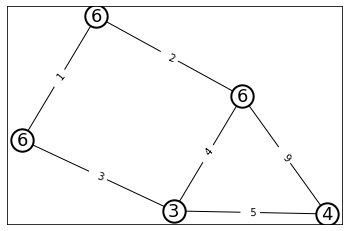

In [9]:
# base graph nodes labeling from a number of regions
three_labeling = hg.labelisation_horizontal_cut_from_num_regions(tree, altitudes, num_regions=3) 

# the labeling is simply an array associating a label to each node of the graph
print("Graph nodes:\t", np.arange(graph.num_vertices()))  
print("Node labels:\t", three_labeling)                      

plot_graph(graph, edge_weights=edge_weights, vertex_labels=three_labeling)

## 4. Demonstration in image processing

Image and gradient


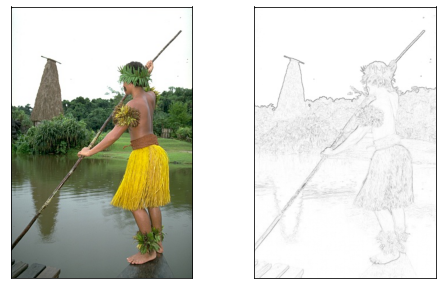

In [10]:
image = imageio.imread("https://github.com/higra/Higra-Notebooks/raw/master/data/101087.jpg") / 255

graph = hg.get_4_adjacency_graph(image.shape[:2])  # create a 4-adjacency graph with the image size

edge_weights = hg.weight_graph(graph, image, weight_function=hg.WeightFunction.L2)  # compute a dissimilarity measure

print("Image and gradient")
plt.figure(figsize=(2 * 3 + 2, 5))
plt.subplot(1,2,1); plt.xticks([]); plt.yticks([]); plt.imshow(image);
plt.subplot(1,2,2); plt.xticks([]); plt.yticks([]); plt.imshow(1 - hg.graph_4_adjacency_2_khalimsky(graph, edge_weights), cmap="gray");

We compute:
 
1. watershed hierarchy by area 
2. the mean image color inside each node of the hierarchy: this is called an attribute

In [11]:
# Watershed hierarchy by area
tree, altitudes = hg.watershed_hierarchy_by_area(graph, edge_weights)

# Mean pixel values inside each node of the tree
mean_color = hg.attribute_mean_vertex_weights(tree, image)

print("The attribute is just an array associating on or several values to each node of the tree:")
print("Number of nodes in the tree:", tree.num_vertices())
print("Shape of the attribute:", mean_color.shape)

The attribute is just an array associating on or several values to each node of the tree:
Number of nodes in the tree: 207149
Shape of the attribute: (207149, 3)


We then compute clustering with different number of clusters and we represent each region by its mean pixel color.

In [12]:
# The HorizontalCutExplorer helps to computes cuts very efficiently in a hierarchy
cut_helper = hg.HorizontalCutExplorer(tree, altitudes)

def compute_cut(num_regions=20):
    cut = cut_helper.horizontal_cut_from_num_regions(num_regions)
    simplified = cut.reconstruct_leaf_data(tree, mean_color)
    plt.figure(figsize=[5,5]);plt.xticks([]); plt.yticks([]); plt.imshow(simplified);
    
from ipywidgets import interact, IntSlider      # for interactive notebooks
interact(compute_cut, num_regions = IntSlider(min=1, max=100, continuous_update=False, value=20, step=1));

interactive(children=(IntSlider(value=20, continuous_update=False, description='num_regions', min=1), Output()…

A way to get an idea of the whole hierarchy in a single image is to use a dual representation called a *saliency map*

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/sm1.png" width="1000px" style="margin-left:auto;margin-right:auto;"/>
</div>

When the base graph is a 4 adjaceny graph, this saliency map can be represented as an image

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/khalimsky.svg" width="800px" style="margin-left:auto;margin-right:auto;"/>
</div>

Let's see how this work in Higra:

The saliency map is just an array associating an altitude to each edge of the graph:
Number of edges: 308000
Shape of the saliency map: (308000,)


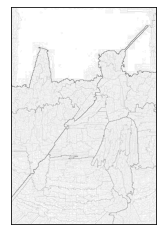

In [13]:
saliency_map = hg.saliency(tree, altitudes)

print("The saliency map is just an array associating an altitude to each edge of the graph:")
print("Number of edges:", graph.num_edges())
print("Shape of the saliency map:", saliency_map.shape)

saliency_khalimsky = hg.graph_4_adjacency_2_khalimsky(graph, saliency_map)
plt.xticks([]); plt.yticks([]); plt.imshow(1-saliency_khalimsky**0.25, cmap="gray");

## 5. Final words

Many more examples in the [documentation](https://higra.readthedocs.io/en/latest/notebooks.html) 

<div style="margin-top:50px">
    <img src="https://raw.githubusercontent.com/PerretB/Higra-Presentation/main/imgs/higra_notebooks.png" width="800px" style="margin-left:auto;margin-right:auto;"/>
</div>